<h1><center>Tutorial on Scikit-learn</center></h1>

### CREATION AND DISPLAY OF A 2-DIMENSIONAL BALANCED DATASET

https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles


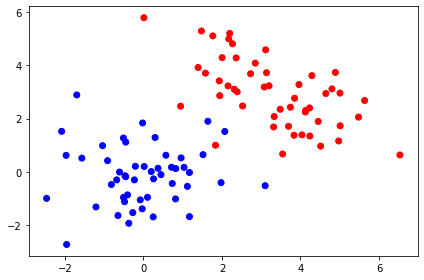

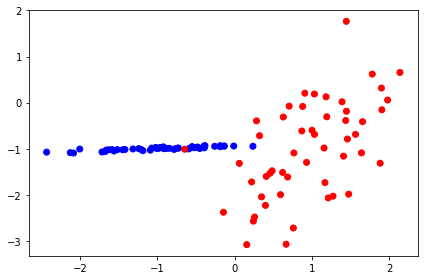

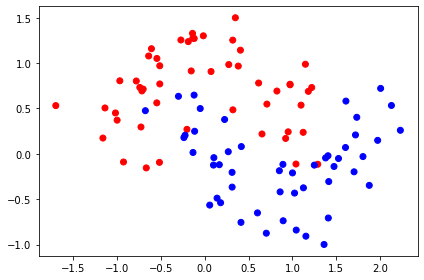

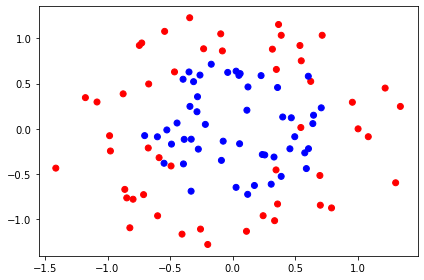

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
n = 100
colormap = ListedColormap(['red','blue'])
dataset_list = []
dataset_labels = ["multivariate_normal", "classification", "moons", "circles"]

###################################################################
### from scratch
mean0 = [3,3]
cov0 = [[2, -1],[-1, 2]]
mean1 = [0,0]
cov1 = [[1, 0],[0, 1]]
neg_data = np.random.multivariate_normal(mean0, cov0, n//2)
pos_data = np.random.multivariate_normal(mean1, cov1, n//2)
X = np.concatenate((neg_data,pos_data),axis=0)
y = np.array((n//2)*[0] + (n//2)*[1])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colormap)
plt.tight_layout()
plt.show()
dataset_list.append((X,y))

###################################################################
### make classif
from sklearn.datasets import make_classification
X, y = make_classification(n_features=2,
                           n_redundant=0,
                           n_informative=2,
                           n_clusters_per_class=1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colormap)
plt.tight_layout()
plt.show()
dataset_list.append((X,y))

###################################################################
### moons
from sklearn.datasets import make_moons
X, y = make_moons(noise=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colormap)
plt.tight_layout()
plt.show()
dataset_list.append((X,y))

###################################################################
### circles
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.2, factor=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=colormap)
plt.tight_layout()
plt.show()
dataset_list.append((X,y))

### CREATION AND DISPLAY OF THE TRAINING AND THE TESTING SET


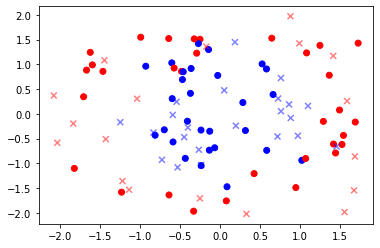

In [44]:
from sklearn.model_selection import train_test_split
X , y = dataset_list[3]

# scale data for display purposes
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=colormap)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=colormap, marker='x', alpha=0.5)


### DEFINE A CLASSIFIER

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [111]:
from sklearn.utils import all_estimators
estimators = all_estimators()
# for name, class_ in estimators:
#     print(name)

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

print()
for i, c in enumerate(classifiers):
    print(f"{i}: {c}")


0: KNeighborsClassifier(n_neighbors=3)
1: SVC(C=0.025, kernel='linear')
2: SVC(C=1, gamma=2)
3: GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))
4: DecisionTreeClassifier(max_depth=5)
5: RandomForestClassifier(max_depth=5, max_features=1, n_estimators=10)
6: MLPClassifier(alpha=1, max_iter=1000)
7: AdaBoostClassifier()
8: GaussianNB()
9: QuadraticDiscriminantAnalysis()


### TRAIN A CLASSIFIER ON THE TRAINING SET (fit method)

In [160]:
from collections import defaultdict
from tqdm.autonotebook import tqdm, trange

nb_run=10

list_dict = lambda: defaultdict(list)
scores = defaultdict(list_dict)
for label, (X, y) in zip(dataset_labels, dataset_list):
    print(label)
    for j in trange(nb_run): # use range if tqdm is not installed
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
        for i, clf in enumerate(classifiers):
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            scores[label][clf.__class__.__name__+"_"+str(i)].append(score)
# scores

In [164]:
import pandas as pd
from IPython.display import display

# df = pd.DataFrame(scores)
df = pd.DataFrame.from_dict({(i,j): scores[i][j] 
                           for i in scores.keys() 
                           for j in scores[i].keys()})
df

multivariate_normal                                            \
  KNeighborsClassifier_0  SVC_1  SVC_2 GaussianProcessClassifier_3   
0                  0.950  0.975  0.925                       0.950   
1                  0.950  0.950  0.925                       0.950   
2                  0.975  0.975  0.975                       0.975   
3                  0.975  0.975  0.950                       0.975   
4                  0.925  0.975  0.925                       0.925   
5                  0.975  1.000  0.925                       0.950   
6                  0.975  0.975  0.975                       0.975   
7                  0.950  0.950  0.950                       0.975   
8                  0.950  1.000  0.875                       0.950   
9                  0.975  0.975  0.925                       0.975   

                                                                     \
  DecisionTreeClassifier_4 RandomForestClassifier_5 MLPClassifier_6   
0                    0.925                    0.950           0.950   
1                    0.900                    0.950           0.950   
2                    0.875                    0.950           0.975   
3                    0.975                    0.975           0.975   
4                    0.900                    0.950           0.975   
5                    0.925                    0.925           0.975   
6                    0.975                    0.975           0.975   
7                    0.950                    0.975           0.950   
8                    0.850                    0.975           0.975   
9                    0.900                    0.925           0.975   

                                                                     ...  \
  AdaBoostClassifier_7 GaussianNB_8 QuadraticDiscriminantAnalysis_9  ...   
0                0.950        0.950                           0.950  ...   
1                0.925        0.950                           0.950  ...   
2                0.975        0.975                           0.975  ...   
3                0.950        0.975                           0.975  ...   
4                0.950        0.950                           0.925  ...   
5                0.925        0.975                           0.975  ...   
6                0.975        0.975                           0.975  ...   
7                0.950        0.950                           0.975  ...   
8                0.925        0.975                           0.975  ...   
9                0.925        0.975                           0.975  ...   

                 circles                                            \
  KNeighborsClassifier_0  SVC_1  SVC_2 GaussianProcessClassifier_3   
0                  0.900  0.450  0.925                       0.975   
1                  0.900  0.400  0.925                       0.925   
2                  0.750  0.425  0.850                       0.875   
3                  0.800  0.450  0.825                       0.825   
4                  0.800  0.650  0.850                       0.825   
5                  0.875  0.350  0.900                       0.900   
6                  0.900  0.450  0.850                       0.925   
7                  0.925  0.475  0.900                       0.925   
8                  0.875  0.425  0.900                       0.925   
9                  0.875  0.425  0.900                       0.900   

                                                                     \
  DecisionTreeClassifier_4 RandomForestClassifier_5 MLPClassifier_6   
0                    0.925                    0.925           0.700   
1                    0.850                    0.875           0.850   
2                    0.800                    0.825           0.575   
3                    0.825                    0.825           0.800   
4                    0.825                    0.800           0.800   
5                    0.825                    0.825         

In [309]:
means = df.mean()
means.index.names = ["dataset", "clf"]
means = means.reset_index(name="score")
# means
# means.sort_values(["dataset", "score"], ascending=False)
means.sort_values(["dataset", "score"], ascending=False)
grouped_df = means.sort_values(["dataset", "score"], ascending=False).groupby("dataset")
for key, item in grouped_df:
    print(key,":\n",item.set_index("clf").score, "\n\n")
#     print(item, "\n\n")

circles :
 clf
GaussianProcessClassifier_3        0.9000
SVC_2                              0.8825
KNeighborsClassifier_0             0.8600
RandomForestClassifier_5           0.8375
GaussianNB_8                       0.8325
QuadraticDiscriminantAnalysis_9    0.8275
DecisionTreeClassifier_4           0.8250
AdaBoostClassifier_7               0.8150
MLPClassifier_6                    0.7825
SVC_1                              0.4500
Name: score, dtype: float64 


classification :
 clf
GaussianNB_8                       0.9900
QuadraticDiscriminantAnalysis_9    0.9900
MLPClassifier_6                    0.9750
GaussianProcessClassifier_3        0.9725
AdaBoostClassifier_7               0.9725
KNeighborsClassifier_0             0.9700
RandomForestClassifier_5           0.9700
SVC_2                              0.9625
SVC_1                              0.9550
DecisionTreeClassifier_4           0.9425
Name: score, dtype: float64 


moons :
 clf
SVC_2                              0.9325
KNeigh

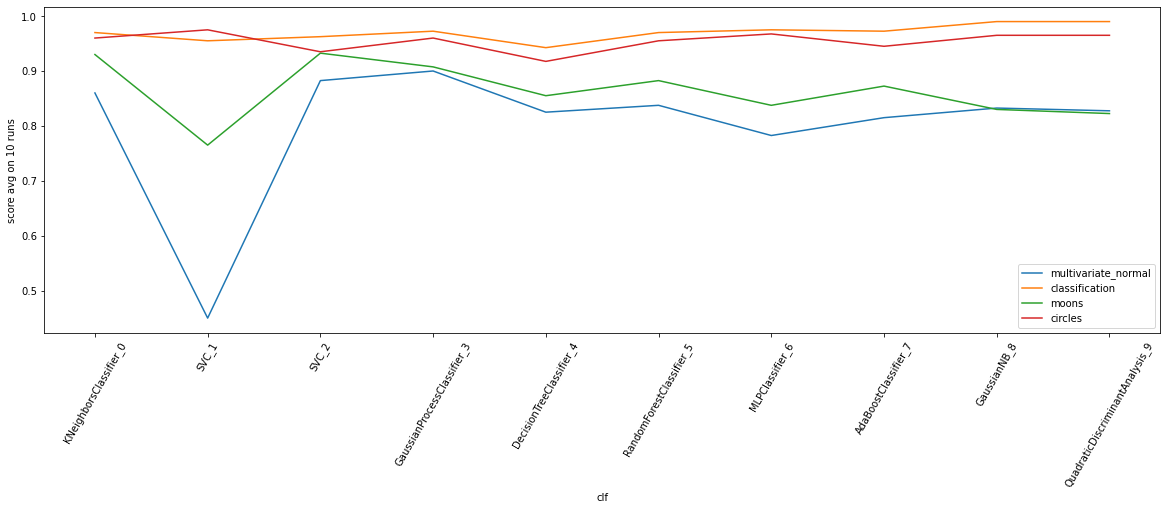

In [251]:
fig, ax = plt.subplots(figsize=(20,6))
means.set_index("clf").groupby("dataset").plot(
    ax=ax, 
    ylabel=f"score avg on {nb_run} runs",
    rot=60,
)
ax.set_xticks(range(means.clf.unique().shape[0]))
ax.set_xticklabels(means.clf.unique())
ax.legend(dataset_labels)

In [110]:
# select classifiers and fit
clf = classifiers[3]
clf.fit(X_train, y_train)

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1))

### USE THE CLASSIFIER TO PREDICT THE LABEL OF THE SAMPLES IN THE TESTING SET (predict method)

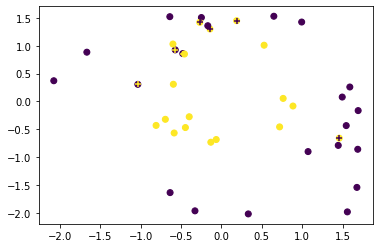

In [81]:
y_pred = clf.predict(X_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='+')

### TEST IT ON THE TESTING SET (score method)

In [82]:
score = clf.score(X_test, y_test)
print(score)

0.825


### DISPLAY OF THE DECISION FUNCTION / PREDICTION PROBABILITY

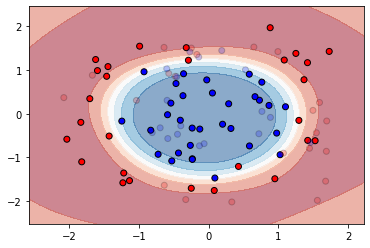

In [83]:
# creation of a mesh
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h))
# display the decision function
cm = plt.cm.RdBu
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.5)
# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=colormap, edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=colormap, alpha=0.2, edgecolors='k')

### OPTIMIZE SOME METAPARAMETERS

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])
score=0.8


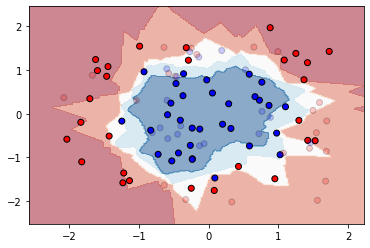

In [112]:
from sklearn.model_selection import GridSearchCV
clf = KNeighborsClassifier()
print(clf.get_params().keys())
meta_parameters = {
    'weights': ['uniform', 'distance'],
    'n_neighbors': [3,4,5,6,7]
}
opt_clf = GridSearchCV(clf, meta_parameters, cv=5)
opt_clf.fit(X_train, y_train)
# score
score = opt_clf.score(X_test, y_test)
print(f"{score=}")

# display
if hasattr(clf, "decision_function"):
    Z = opt_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = opt_clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.5)
# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=colormap, edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=colormap, alpha=0.2, edgecolors='k')

In [115]:
def grid_search(clf, meta_parameters):
    opt_clf = GridSearchCV(clf, meta_parameters, cv=5)
    opt_clf.fit(X_train, y_train)
    # score
    score = opt_clf.score(X_test, y_test)
    print(f"{score=}")

    # display
    if hasattr(clf, "decision_function"):
        Z = opt_clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = opt_clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.5)
    # Plot the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=colormap, edgecolors='k')
    # Plot the testing points
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=colormap, alpha=0.5, marker='x', edgecolors='k')

In [114]:
clf = GaussianProcessClassifier(1.0 * RBF(1.0))
print(clf.get_params().keys())


dict_keys(['copy_X_train', 'kernel__k1', 'kernel__k2', 'kernel__k1__constant_value', 'kernel__k1__constant_value_bounds', 'kernel__k2__length_scale', 'kernel__k2__length_scale_bounds', 'kernel', 'max_iter_predict', 'multi_class', 'n_jobs', 'n_restarts_optimizer', 'optimizer', 'random_state', 'warm_start'])


**Please copy and paste policy simulation average results here (what appears in the terminal):**

500 simulations played.
Exp total reward =  25.625719999999994
Std Exp total reward =  2.4924832760923357


### Task 2.4 : quantitative and qualitative comparison with the random policy used during experiments

**In the following, another preprocessed dataset is given. This dataset includes the global_score reached by each participant and mission**

#### Task 2.4.1: Quantitative comparison

1. Compute the average number of trees extinguished following the random policy used during the experiments
2. Compare this results with the observed results (total_rewards) for 72 simulations of 60 steps (which is equivalent to 18 participants x 4 mission)
3. Perform a statistical test to verify if the value reached by the optimized policy is significatively greater.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy.stats import ttest_ind

## Computing the average number of trees extinghuised following the random policy used during the experiments
# importing data
dfaveraged_data = pd.read_csv('./data/averagedPMPV_data.csv')
dfaveraged_data.columns
print("Avg. global scores from dataset : ", np.mean(dfaveraged_data["global_score"]))
#print(np.std(dfaveraged_data["global_score"]))

### copy the total rewards observed on your 72 simulations here
pomdp_obs_ttrew = [24.919999999999987, 24.359999999999978, 26.120000000000008, 26.160000000000036, 
                   27.59000000000003, 29.739999999999984, 23.459999999999997, 25.619999999999973, 
                   20.860000000000007, 25.17999999999997, 25.80999999999999, 22.82000000000001, 
                   21.70999999999999, 25.16000000000004, 22.80999999999998, 25.859999999999978, 
                   22.47000000000002, 25.629999999999995, 26.120000000000005, 29.449999999999974, 
                   27.430000000000003, 24.879999999999995, 28.96999999999998, 26.989999999999995, 
                   24.11000000000001, 28.889999999999983, 25.779999999999987, 22.549999999999997, 
                   22.73999999999999, 24.97999999999998, 23.899999999999974, 26.909999999999997, 
                   23.449999999999992, 23.06, 24.89999999999998, 29.259999999999977, 27.099999999999984, 
                   26.00000000000003, 27.22999999999998, 28.359999999999992, 27.389999999999983, 
                   32.309999999999974, 22.920000000000012, 21.6, 29.429999999999993, 31.119999999999994, 
                   25.480000000000004, 26.369999999999987, 24.99000000000001, 26.729999999999976, 
                   27.679999999999982, 22.939999999999998, 24.060000000000024, 28.689999999999973, 
                   27.599999999999998, 24.68999999999998, 26.99999999999998, 28.349999999999998, 
                   27.1, 23.329999999999995, 24.200000000000024, 27.520000000000007, 26.79000000000003, 
                   25.699999999999992, 24.89999999999998, 25.84999999999998, 29.039999999999978, 
                   22.149999999999995, 24.819999999999997, 20.549999999999994, 24.359999999999978, 
                   24.579999999999995]
print("Avg. global scores from simulations : ", np.mean(pomdp_obs_ttrew))

### perform a statistical test to check the hypothesis that the optimized policy achieve 
### a high expected value than the random policy used during experiments for data acquisition
ttest_ind(dfaveraged_data["global_score"], pomdp_obs_ttrew)

Avg. global scores from dataset :  22.083333333333332
Avg. global scores from simulations :  25.688611111111104


Ttest_indResult(statistic=-2.981264795841181, pvalue=0.0033787920228876365)

**Draw your conclusion here :** 

### Task 2.4.2: Qualitative comparison by performing a replay withj collected data

Save the classifier model you have designed. It will be used by a replay runner to rerun a mission.
Our goal is to : 
1. follow the predictor outputs (our observationsl)
2. visualize belief state updates about the human operator's engament
3. check what the POMDP policy would do

***Save your the classifier model***

In [38]:
from sklearn import datasets
from joblib import dump, load

subdataset_values = subdataset.values
label = subdataset_values[:,len(subdataset.columns)-1]
features = subdataset_values[:,0:(len(subdataset.columns)-1)]

## recreate your classifier object
clf = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], algorithm=best_params['algorithm'], 
                          weights=best_params['weights'])

# fit it using all your dataset
clf.fit(features, label)

# save the model
dump(clf, 'classifier.joblib')


['classifier.joblib']

Now, save this classifier.joblib file in "PyPOMDP/pypompd/data/" folder, and

***Run the replay program in the same terminal as before***

note you may choose a subject file (one of the excluded participants for instance) for replay the experiment, see this example

**python replay.py pbvi --env Firefighter-2D.POMDP --policyfile alphavecfile.policy --logfile logFIREpbvi --max_play 60 --option replay --sim 4 --expfile data/dfsub_33alldataproc.csv --classif YOUR_CLASSIFIER_MODEL --fnames THE_FEATURES_NAMES_YOU_USED**

You may get a look in the log folder. The last logfile will detail all symbolic observations construct from the physiological and behavioral features

***Draw your conclusions here:***

## Task 3 (Optional)

### Refine the POMDP model to integrate a visible state variable $s_r$ to indicate the operation mode of the robot as part of the state**

In this part, the aim is to expand the state spape $S$ such as: $S = S_h \times S_r$, with $S_h=\{e, ne\}$ and $S_r=\{manu,auto\}$, and to conditionnate the observation function with respect to the action taken.

1. If you observe the replay of experiences, how could you model the fact that when the robot operation mode changes, there is a bigger/lower change the state of the human operator changes ?

2. If this fact is taken into account, it may changes the transition function. So, let's consider now two additionnal expert parameters $\beta$ and $\eta$ that will express the chance we have to obtain for instance : 
$$p(s'=(engaged,manual)|s=(engaged,auto),a=manual) = 1-\beta$$
$$p(s'=(notengaged,manual)|s=(engaged,auto),a=manual) = \beta$$
$$p(s'=(engaged,auto)|s=(engaged,manual),a=auto) = 1-\eta$$
$$p(s'=(notengaged,auto)|s=(engaged,manual),a=auto) = \eta$$

Note the transition function, now a $4x4$ matrix need to modified to integrate this new parameters. We will assume that the robot operation mode state variable has a deterministic dynamic, meaning that is the action chosen in $auto$, we are $100\%$ sur that the operation mode is it was $manual$ will pass to $auto$. If you have any problem with the grammar of the POMDP file description get a look at https://www.pomdp.org/code/pomdp-file-spec.html

2. Note, you may learn an obervation function now conditionned on the action, to be able to integrate this new probabilities through belief state updates, i.e. : $b^o_a(s') \propto p(o|s',a)p(s'|s,a)b(s)$ 

3. Please revise some of the previous tasks in the cells bellow. 

### Revise task 1.1.3 to separate your dataset in two datasets depending on the robot operation mode 

In [12]:
import pandas as pd
import numpy as np

# importing data
df10labeled_data = pd.read_csv('./data/df10labeled_data.csv')
print(df10labeled_data)

## excluding some subjects for experience replay purposes (see Task 2)
## we empirically choose to exclude subjects 19, 23, 33, 38
subdf10labeled_data = df10labeled_data.loc[(df10labeled_data["subject"]!=19)&
                                           (df10labeled_data["subject"]!=23)&
                                           (df10labeled_data["subject"]!=33)&
                                           (df10labeled_data["subject"]!=38)]
print(subdf10labeled_data)

# separate the dataset with respect to operation mode
subdataset_manu = subdf10labeled_data.loc[subdf10labeled_data["mode"]==0]
subdataset_auto = subdf10labeled_data.loc[subdf10labeled_data["mode"]==1]
# example of data selection : please explore new combinations following your previous analysis !!
subsubdataset_manu = subdataset_manu.loc[:, ['HRV', 
                                      'HRnorm', 
                                      'nav', 
                                      'tank', 
                                      'nbAOI1', 
                                      'nbAOI2', 
                                      'nbAOI3', 
                                      'nbAOI4', 
                                      'nbAOI5', 
                                      'label']]

subsubdataset_auto = subdataset_auto.loc[:, ['HRV', 
                                      'HRnorm', 
                                      'nav', 
                                      'tank', 
                                      'nbAOI1', 
                                      'nbAOI2', 
                                      'nbAOI3', 
                                      'nbAOI4', 
                                      'nbAOI5', 
                                      'label']]

print(subsubdataset_manu)
print(subsubdataset_auto)

      subject  mission  mode         HR       HRV   nav  tank  space  trees  \
0        19.0      1.0   0.0  72.568940 -0.066819  14.0   0.0    0.0    0.0   
1        19.0      1.0   0.0  74.229865 -0.087446  18.0   2.0    0.0    0.0   
2        19.0      1.0   1.0  73.304826 -0.070724   9.0   5.0    0.0    0.0   
3        19.0      1.0   1.0  69.962687 -0.050697   0.0   8.0    0.0    0.0   
4        19.0      1.0   1.0  70.771408 -0.076950   0.0   7.0    0.0    1.0   
...       ...      ...   ...        ...       ...   ...   ...    ...    ...   
3586     40.0      4.0   1.0  69.767442 -0.041904   0.0  24.0    0.0    0.0   
3587     40.0      4.0   0.0  67.046597 -0.043276  12.0   8.0    0.0    0.0   
3588     40.0      4.0   0.0  69.549090 -0.044936  10.0  14.0    0.0    0.0   
3589     40.0      4.0   0.0  72.245635 -0.045260   6.0   8.0    1.0    0.0   
3590     40.0      4.0   1.0  71.564885 -0.048838   2.0   9.0    0.0    0.0   

      nbAOI1  ...  nbAOI4  nbAOI5  durAOI1   durAOI

### Revise tasks 1.1.4 and 1.1.5 to train a classifier per dataset and then, extract their confusion matrix

In [25]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score, accuracy_score, balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn import datasets
from joblib import dump, load

clfs = [LinearDiscriminantAnalysis(n_components=None), 
        QuadraticDiscriminantAnalysis(), 
        KNeighborsClassifier(algorithm='auto', n_neighbors=5, weights='uniform'), 
        SVC(kernel="linear", C=0.025), 
        SVC(kernel="rbf", gamma=0.15, C=2), 
        GaussianProcessClassifier(2.0 * RBF(1.0)), 
        DecisionTreeClassifier(max_depth=15), 
        RandomForestClassifier(max_depth=15, n_estimators=10, max_features=1), 
        MLPClassifier(alpha=1), AdaBoostClassifier(),
        GaussianNB()
       ]

### Please choose a classifier -> QDA example
clf = clfs[2]

######################################################
## Hyper parameters grid search for a given classifier
######################################################
## Selecting features and label
## print(subsubdataset_manu)
## print(subsubdataset_auto)
subsubdataset_manu_values = subsubdataset_manu.values
subsubdataset_auto_values = subsubdataset_auto.values
datasetsdict = {"manu" : subsubdataset_manu_values, "auto" : subsubdataset_auto_values}
for case in datasetsdict.keys():
    #print(datasets[case].shape[1])
    label = datasetsdict[case][:,(datasetsdict[case].shape[1]-1)]
    features = datasetsdict[case][:,0:(datasetsdict[case].shape[1]-1)]
    #print(features)
    
    ## validation set proportion
    validation_size = 0.20
    features_train, features_test, label_train, label_test = train_test_split(features, label, test_size=validation_size)
    
    # set the parameters by cross-validation
    #tuned_parameters = [{'priors':[None], 'reg_param' : [0.0, 1.0, 2.0, 3.0]}]
    tuned_parameters = [{'n_neighbors':[2, 3, 4, 5, 6, 7, 8, 9, 10], 'weights' : ['uniform', 'distance'], 
                     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}]

    # scores examples for GridSearch -> balanced accuracy score example
    scores = ['precision_macro', 'recall_macro', 'f1_macro', make_scorer(accuracy_score), make_scorer(balanced_accuracy_score)]
    score = scores[4]

    print("# Tuning hyper-parameters for %s" % score)
    print()
    gridsearch_paramclf = GridSearchCV(clf, tuned_parameters, cv=5, scoring=score)
    gridsearch_paramclf.fit(features_train, label_train)

    #print("Options considered and related results:")
    means = gridsearch_paramclf.cv_results_['mean_test_score']
    stds = gridsearch_paramclf.cv_results_['std_test_score']
    
    # Best model parameters given the score chosen
    #print("Best parameters set found on development set:")
    best_params = gridsearch_paramclf.best_params_
    #print(gridsearch_paramclf.best_params_)
    #print()

    ## Cross-validate your classifier
    clf = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], algorithm=best_params['algorithm'], 
                          weights=best_params['weights'])
    scoring = {'prec_macro': 'precision_macro',
           'rec_macro': make_scorer(recall_score, average='macro'),
           'f1_macro': 'f1_macro',
           'acc_macro': make_scorer(accuracy_score),
           'bal_acc_macro': make_scorer(balanced_accuracy_score)}

    ## Cross validation for the best parameters
    all_scores={}
    cv = ShuffleSplit(n_splits=100, test_size=0.2)
    scores = cross_validate(clf, features, label, scoring=scoring, cv=cv, return_train_score=False, n_jobs=2)
    all_scores=scores
    
    print(case, best_params)
    print("Precision: %0.2f (+/- %0.2f)" % (np.mean(all_scores['test_prec_macro']), np.std(all_scores['test_prec_macro'])*2) )
    print("Recall: %0.2f (+/- %0.2f)" % (np.mean(all_scores['test_rec_macro']), np.std(all_scores['test_rec_macro'])*2) )
    print("F1-score: %0.2f (+/- %0.2f)" % (np.mean(all_scores['test_f1_macro']), np.std(all_scores['test_f1_macro'])*2) )
    print("Accuracy: %0.2f (+/- %0.2f)" % (np.mean(all_scores['test_acc_macro']), np.std(all_scores['test_acc_macro'])*2) )
    print("Balanced Accuracy: %0.2f (+/- %0.2f)" % (np.mean(all_scores['test_bal_acc_macro']), np.std(all_scores['test_bal_acc_macro'])*2) )


    print("Confusion Matrix")
    ## where : 0   1
    ##     0 [[tn fn]
    ##     1 [fp tp]]
    predicted = cross_val_predict(clf, features, label, cv=5)
    print(confusion_matrix(label, predicted))
    tn, fp, fn, tp = confusion_matrix(label, predicted).ravel()
    print("tn ", tn)
    print("fp ", fp)
    print("fn ", fn)
    print("tp ", tp)
    print("Total number of label 0 :", label.tolist().count(0), tn+fp)
    print("Total number of label 1 :", label.tolist().count(1), fn+tp)
    print(tn/label.tolist().count(0), fn/label.tolist().count(1))
    print(fp/label.tolist().count(0), tp/label.tolist().count(1))
    

    clf = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], algorithm=best_params['algorithm'], 
                          weights=best_params['weights'])
    # fit it using part of the dataset
    clf.fit(features, label)
    # save the model
    dump(clf, 'classifier_'+case+'.joblib')

# Tuning hyper-parameters for make_scorer(balanced_accuracy_score)

manu {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}
Precision: 0.76 (+/- 0.05)
Recall: 0.76 (+/- 0.05)
F1-score: 0.75 (+/- 0.05)
Accuracy: 0.76 (+/- 0.05)
Balanced Accuracy: 0.76 (+/- 0.05)
Confusion Matrix
[[446 215]
 [140 538]]
tn  446
fp  215
fn  140
tp  538
Total number of label 0 : 661 661
Total number of label 1 : 678 678
0.6747352496217852 0.20648967551622419
0.32526475037821484 0.7935103244837758
# Tuning hyper-parameters for make_scorer(balanced_accuracy_score)

auto {'algorithm': 'auto', 'n_neighbors': 6, 'weights': 'distance'}
Precision: 0.76 (+/- 0.05)
Recall: 0.76 (+/- 0.05)
F1-score: 0.75 (+/- 0.05)
Accuracy: 0.76 (+/- 0.05)
Balanced Accuracy: 0.76 (+/- 0.05)
Confusion Matrix
[[392 203]
 [223 522]]
tn  392
fp  203
fn  223
tp  522
Total number of label 0 : 595 595
Total number of label 1 : 745 745
0.6588235294117647 0.2993288590604027
0.3411764705882353 0.7006711409395974


### Revise task 2.1 to define your POMDP in the Cassandra file format

Note you may probably have different transition and observations functions depending on the action manu/auto

### Firefighter.4D.POMDP

discount: 0.95
values: reward
states: notengagedmanu engagedmanu notengagedauto engagedauto 
actions: manu auto
observations: onotengaged oengaged

start: 0.25 0.25 0.25 0.25

#### action manu
T: manu
0.9 0.1 0.0 0.0
0.1 0.9 0.0 0.0
0.95 0.05 0.0 0.0
0.05 0.95 0.0 0.0


#### action auto
T: auto
0.0 0.0 0.80 0.20
0.0 0.0 0.20 0.80
0.0 0.0 0.9 0.1
0.0 0.0 0.1 0.9


O: manu : notengagedmanu : onotengaged 0.67
O: manu : notengagedmanu : oengaged 0.33
 
O: manu : engagedmanu : onotengaged 0.20
O: manu : engagedmanu : oengaged 0.80

O: manu : notengagedauto : onotengaged 0.67
O: manu : notengagedauto : oengaged 0.33

O: manu : engagedauto : onotengaged 0.20
O: manu : engagedauto : oengaged 0.80

O: auto : notengagedmanu : onotengaged 0.65
O: auto : notengagedmanu : oengaged 0.35
 
O: auto : engagedmanu : onotengaged 0.29
O: auto : engagedmanu : oengaged 0.71

O: auto : notengagedauto : onotengaged 0.65
O: auto : notengagedauto : oengaged 0.35

O: auto : engagedauto : onotengaged 0.29
O: auto : engagedauto : oengaged 0.71

R: manu : engagedmanu : * : * 0.55
R: manu : engagedauto : * : * 0.55

R: manu : notengagedmanu : * : * 0.28
R: manu : notengagedauto : * : * 0.28

R: auto : engagedmanu : * : * 0.41
R: auto : engagedauto : * : * 0.41

R: auto : notengagedmanu : * : * 0.35
R: auto : notengagedauto : * : * 0.35

### Revise tasks 2.2 and 2.3, please copy/paste the simulation results hereafter

#### Results obtained by simulating the new model
500 simulations played.
Exp total reward =  26.029399999999995
Std Exp total reward =  2.560470277117073

